In [134]:
import numpy as np
import matplotlib.pyplot as plt


In [163]:

def f_true(x):
    return 0.03 * x ** 4 - 0.4 * x ** 2 + 1.5 * np.sin(2.2 * x) ** 2 + 0.4 * np.exp(x)

def make_poly_features(x, degree):
    x = np.asarray(x).reshape(-1, 1)
    X = np.hstack([x ** i for i in range(degree + 1)])
    return X

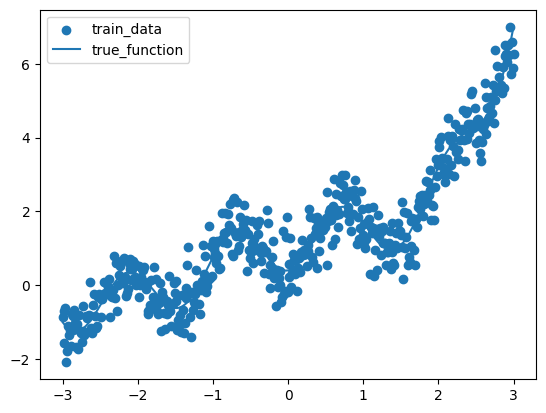

In [164]:
rng = np.random.default_rng(42)

N = 500
x = np.linspace(-3, 3, N)

sigma = 0.5
y = f_true(x) + rng.normal(0, sigma, size=x.shape)

degree = 15
X = make_poly_features(x, degree)

plt.scatter(x, y, label='train_data')
plt.plot(x, f_true(x), label='true_function')
plt.legend()
plt.show()

In [165]:
lamb = 10000.0
alpha = 1.0 / (sigma ** 2)

M = X.shape[1]
posterior_cov_inv = lamb * np.eye(M) + alpha * (X.T @ X)

In [166]:
posterior_cov = np.linalg.inv(posterior_cov_inv)
mean = alpha * posterior_cov @ (X.T @ y)

In [167]:
x_new = np.linspace(-3, 3, 400)
X_new = make_poly_features(x_new, degree)

mean_pred = X_new @ mean
var_pred = 1.0 / alpha + np.sum(X_new @ posterior_cov @ X_new.T, axis=1)
std_pred = np.sqrt(var_pred)

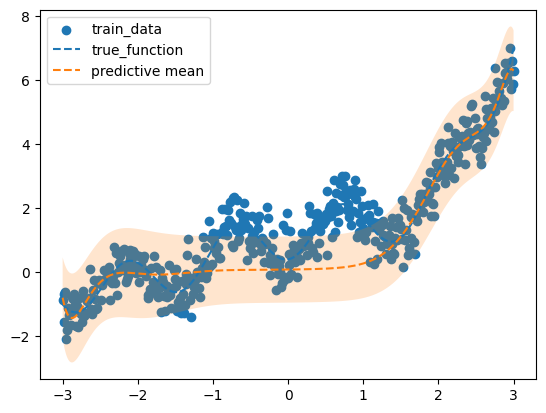

In [168]:
plt.scatter(x, y, label='train_data')
plt.plot(x_new, f_true(x_new), linestyle='--', label='true_function')
plt.plot(x_new, mean_pred, linestyle='--', label='predictive mean')

plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, alpha=0.2)

plt.legend()
plt.show()

In [169]:
def log_evidence(lamb, X, y, alpha):
    N, M = X.shape
    C = (1.0 / alpha) * np.eye(N) + (1.0 / (alpha * lamb)) * (X @ X.T)
    log_det_C = np.linalg.slogdet(C)[1]
    eps = 1e-12 * np.trace(C) / N
    L = np.linalg.cholesky(C + eps * np.eye(N))
    z = np.linalg.solve(L, y)
    log_evidence_val = -0.5 * (N * np.log(2 * np.pi) + log_det_C + z @ z)
    return log_evidence_val


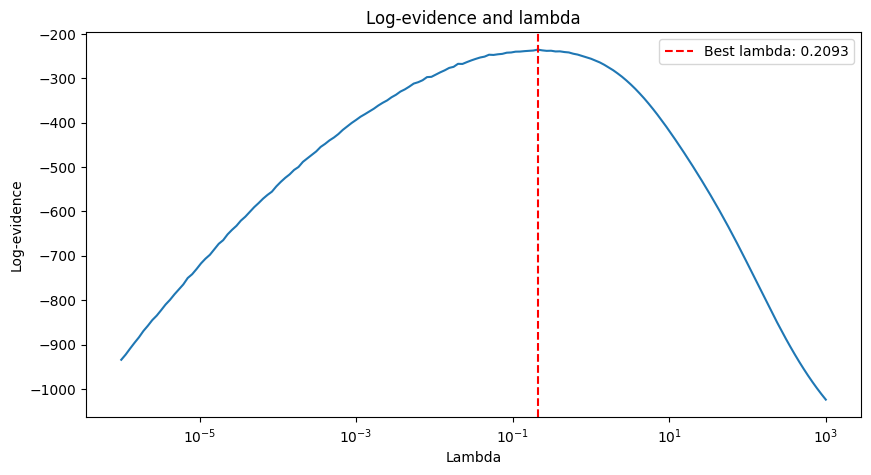

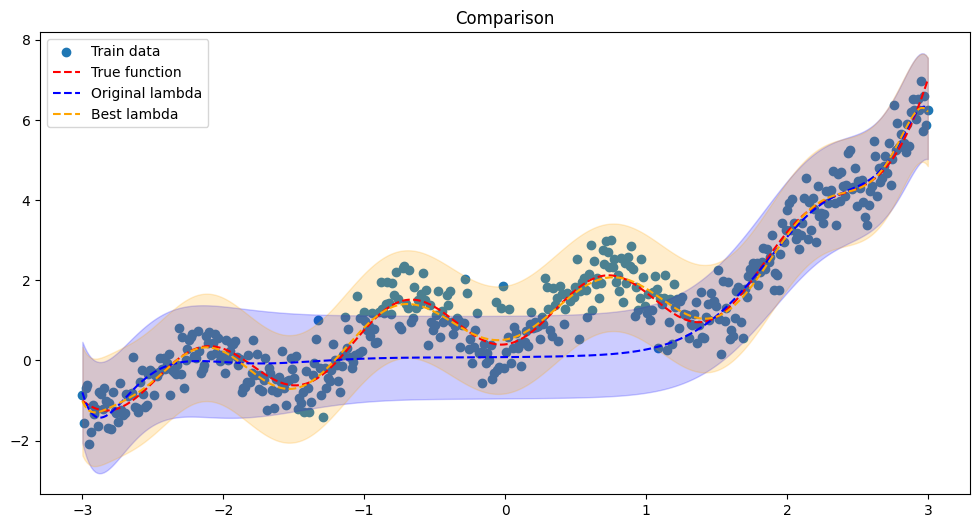

In [170]:
lambdas = np.logspace(-6, 3, 160)
log_evidence_values = [log_evidence(l, X, y, alpha) for l in lambdas]

best_lambda_index = np.argmax(log_evidence_values)
best_lambda = lambdas[best_lambda_index]

posterior_cov_inv_best = best_lambda * np.eye(M) + alpha * (X.T @ X)
posterior_cov_best = np.linalg.inv(posterior_cov_inv_best)
mean_best = alpha * posterior_cov_best @ (X.T @ y)

mean_pred_best = X_new @ mean_best
var_pred_best = 1.0 / alpha + np.sum(X_new @ posterior_cov_best @ X_new.T, axis=1)
std_pred_best = np.sqrt(var_pred_best)

plt.figure(figsize=(10, 5))
plt.plot(lambdas, log_evidence_values)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Log-evidence')
plt.title('Log-evidence and lambda')
plt.axvline(best_lambda, color='red', linestyle='--', label=f'Best lambda: {best_lambda:.4f}')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Train data')
plt.plot(x_new, f_true(x_new), linestyle='--', label='True function', color='red')
plt.plot(x_new, mean_pred, linestyle='--', label='Original lambda', color='blue')
plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, alpha=0.2, color='blue')

plt.plot(x_new, mean_pred_best, linestyle='--', label='Best lambda', color='orange')
plt.fill_between(x_new, mean_pred_best - 2 * std_pred_best, mean_pred_best + 2 * std_pred_best, alpha=0.2, color='orange')


plt.legend()
plt.title('Comparison')
plt.show()